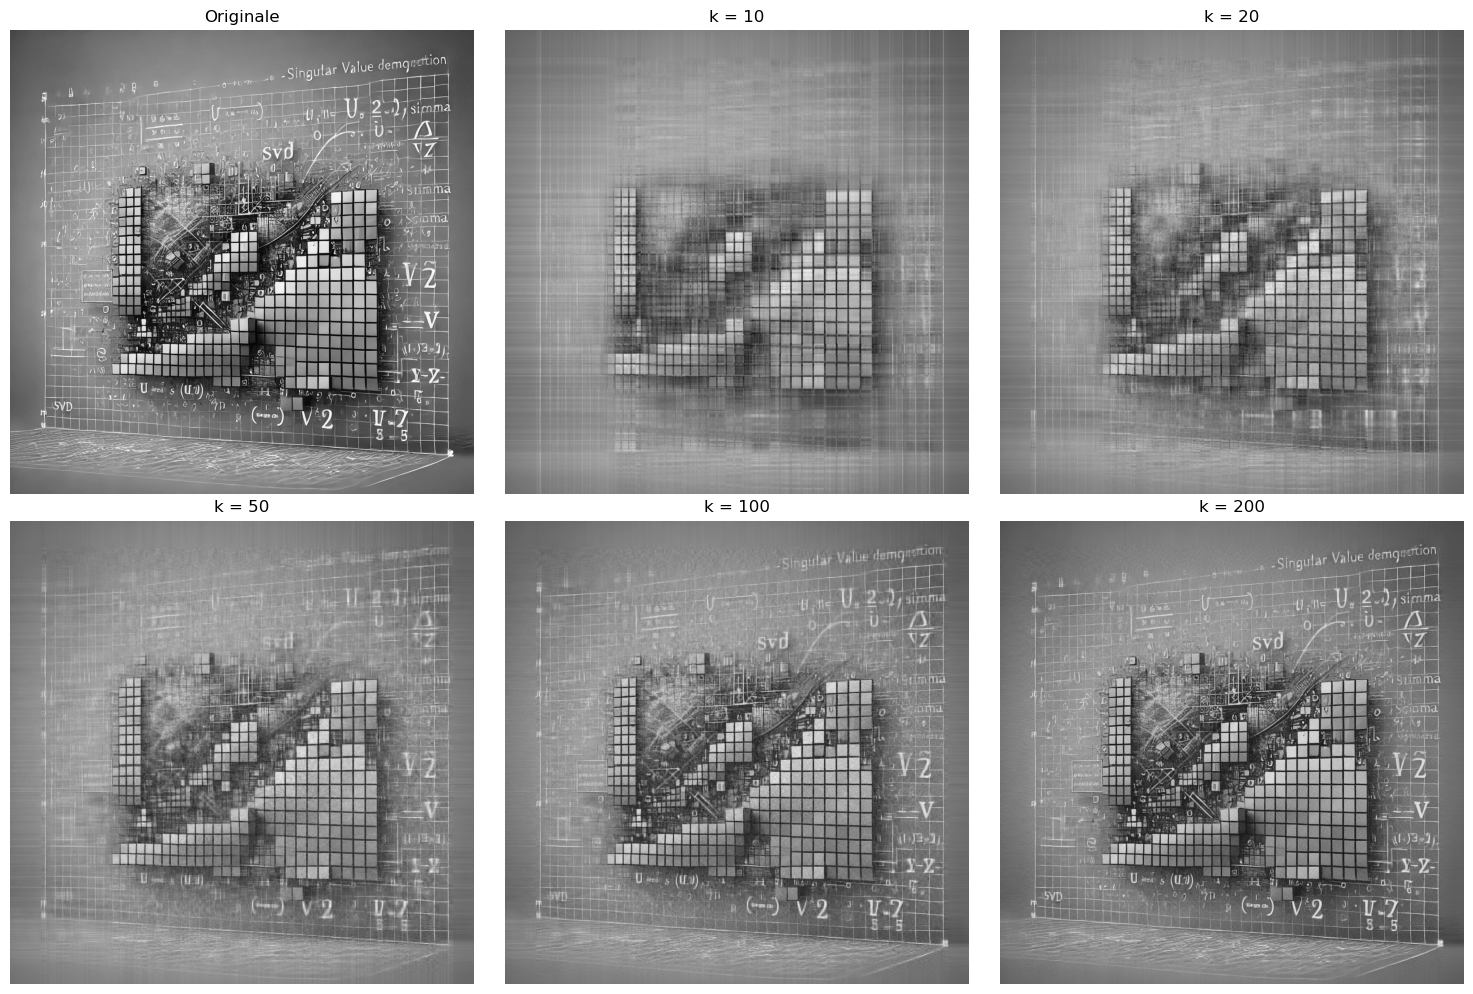

Métriques de reconstruction (MSE) :
Pour k = 10 : MSE = 0.0130
Pour k = 20 : MSE = 0.0097
Pour k = 50 : MSE = 0.0060
Pour k = 100 : MSE = 0.0034
Pour k = 200 : MSE = 0.0014

Métriques de compression (Ratio) :
Pour k = 10 : Ratio = 0.0195
Pour k = 20 : Ratio = 0.0391
Pour k = 50 : Ratio = 0.0977
Pour k = 100 : Ratio = 0.1954
Pour k = 200 : Ratio = 0.3908


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

# Étape 1 : Chargement de l'image et conversion en niveaux de gris
def load_and_convert_image(image_path):
    # Charger l'image
    image = io.imread(image_path)
    # Convertir en niveaux de gris si l'image est en couleur
    grayscale_image = color.rgb2gray(image) if image.ndim == 3 else image
    return grayscale_image

# Étape 2 : Appliquer la SVD
def apply_svd(image_matrix):
    U, Sigma, VT = np.linalg.svd(image_matrix, full_matrices=False)
    return U, Sigma, VT

# Étape 3 : Reconstruction de l'image
def reconstruct_image(U, Sigma, VT, k):
    # Garder les k premières composantes
    U_k = U[:, :k]
    Sigma_k = np.diag(Sigma[:k])
    VT_k = VT[:k, :]
    # Reconstruction de l'image
    reconstructed = np.dot(U_k, np.dot(Sigma_k, VT_k))
    return reconstructed

# Étape 4 : Afficher les résultats
def display_images(original, compressed_images, k_values):
    num_images = len(k_values) + 1  # Nombre total d'images (originale + compressées)
    num_cols = 3  # Nombre de colonnes par ligne
    num_rows = (num_images + num_cols - 1) // num_cols  # Calculer le nombre de lignes
    
    plt.figure(figsize=(15, 10))  # Augmenter la taille de la figure pour une meilleure visibilité
    
    # Afficher l'image originale
    plt.subplot(num_rows, num_cols, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Originale")
    plt.axis('off')
    
    # Afficher les images compressées
    for i, (img, k) in enumerate(zip(compressed_images, k_values), start=2):
        plt.subplot(num_rows, num_cols, i)
        plt.imshow(img, cmap='gray')
        plt.title(f"k = {k}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Étape 5 : Calcul des métriques
def calculate_mse(original, compressed):
    return np.mean((original - compressed) ** 2)

def calculate_compression_ratio(original_shape, k):
    original_size = original_shape[0] * original_shape[1]
    compressed_size = k * (1 + original_shape[0] + original_shape[1])
    return compressed_size / original_size

# Main : Exécution du projet
def main():
    image_path = "imageoriginal.png"  # Chemin de votre image
    k_values = [10, 20, 50, 100, 200]  # Valeurs de k pour la compression
    
    # Charger l'image
    original_image = load_and_convert_image(image_path)
    
    # Appliquer la SVD
    U, Sigma, VT = apply_svd(original_image)
    
    # Reconstruction pour différentes valeurs de k
    compressed_images = [reconstruct_image(U, Sigma, VT, k) for k in k_values]
    
    # Afficher les images
    display_images(original_image, compressed_images, k_values)
    
    # Calculer et afficher les MSE
    print("Métriques de reconstruction (MSE) :")
    for k, compressed in zip(k_values, compressed_images):
        mse = calculate_mse(original_image, compressed)
        print(f"Pour k = {k} : MSE = {mse:.4f}")
    
    # Calculer et afficher les ratios de compression
    print("\nMétriques de compression (Ratio) :")
    for k in k_values:
        ratio = calculate_compression_ratio(original_image.shape, k)
        print(f"Pour k = {k} : Ratio = {ratio:.4f}")

if __name__ == "__main__":
    main()
